<a href="https://colab.research.google.com/github/akankshaj-8799/Final-Year-Project/blob/main/Linear_Forecasting_of_Covid_19_final_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
#Importing the dataset
path = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv'
df = pd.read_csv(path)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


In [ ]:
#Checking the information of the data in the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
#changing Date type from object type to DateTime type
df = pd.read_csv(path,parse_dates=['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
# again checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


In [ ]:
#adding new column Active by calculating active
active = df['Confirmed'] - df['Recovered'] - df['Deaths']
df['Active'] = active
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [ ]:
active = df.groupby('Date')['Active'].sum().reset_index()


In [ ]:
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.tail()

,Date,Confirmed
811,2022-04-12,500880363
812,2022-04-13,501920234
813,2022-04-14,502892186
814,2022-04-15,503606396
815,2022-04-16,504155459


In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
### a library in python created by facebook for the time series analysis (forecasting)

In [ ]:
confirmed.rename(columns={'Date':"ds","Confirmed":"y"},inplace=True)
confirmed

,ds,y
0,2020-01-22,557
1,2020-01-23,657
2,2020-01-24,944
3,2020-01-25,1437
4,2020-01-26,2120
...,...,...
811,2022-04-12,500880363
812,2022-04-13,501920234
813,2022-04-14,502892186
814,2022-04-15,503606396


In [ ]:
###building the model
model = Prophet(interval_width=0.95)
 ###confidence level

In [ ]:
###apply the model (train the model)
model.fit(confirmed)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumm6xyva/k9fizdvp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumm6xyva/5ddhttn4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29653', 'data', 'file=/tmp/tmpumm6xyva/k9fizdvp.json', 'init=/tmp/tmpumm6xyva/5ddhttn4.json', 'output', 'file=/tmp/tmpumm6xyva/prophet_model6_55atnd/prophet_model-20241124104232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:42:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:42:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe (periods=7)
future.tail(7)

,ds
816,2022-04-17
817,2022-04-18
818,2022-04-19
819,2022-04-20
820,2022-04-21
821,2022-04-22
822,2022-04-23


In [ ]:
forecast=model.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
816,2022-04-17,5.074622e+08,5.057540e+08,5.091809e+08
817,2022-04-18,5.085291e+08,5.067917e+08,5.100376e+08
818,2022-04-19,5.096553e+08,5.080730e+08,5.113443e+08
819,2022-04-20,5.108397e+08,5.091315e+08,5.125959e+08
820,2022-04-21,5.120082e+08,5.102119e+08,5.139077e+08
821,2022-04-22,5.131608e+08,5.113358e+08,5.150557e+08
822,2022-04-23,5.141854e+08,5.120344e+08,5.162055e+08


<Axes: xlabel='ds'>

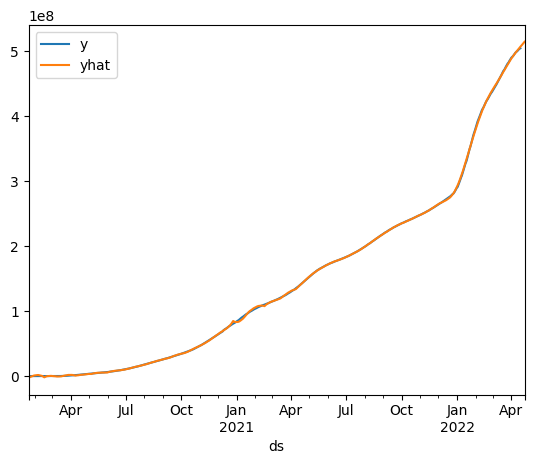

In [ ]:
pd.concat([confirmed.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

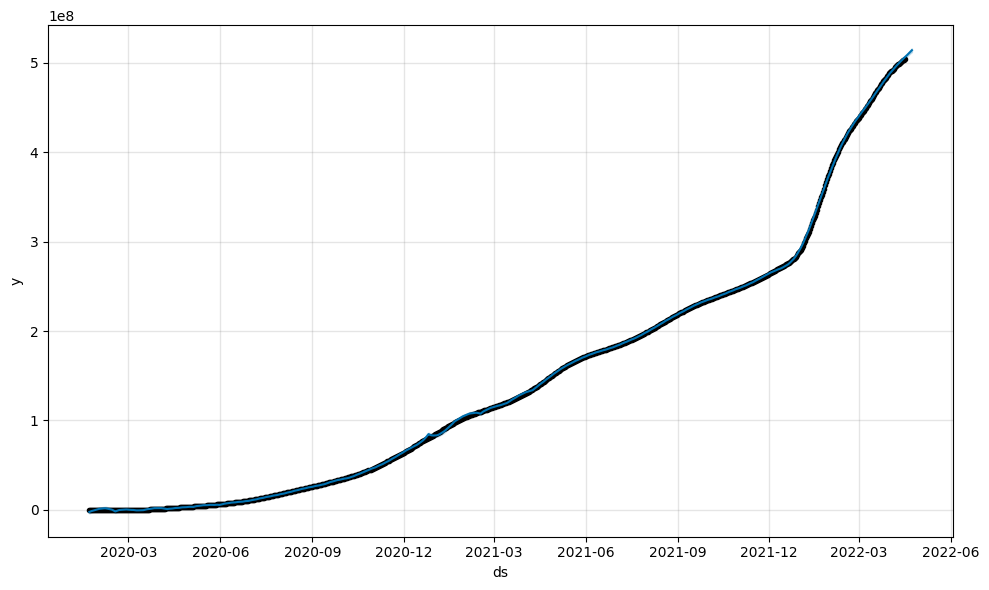

In [ ]:
confirmed_plot = model.plot(forecast)

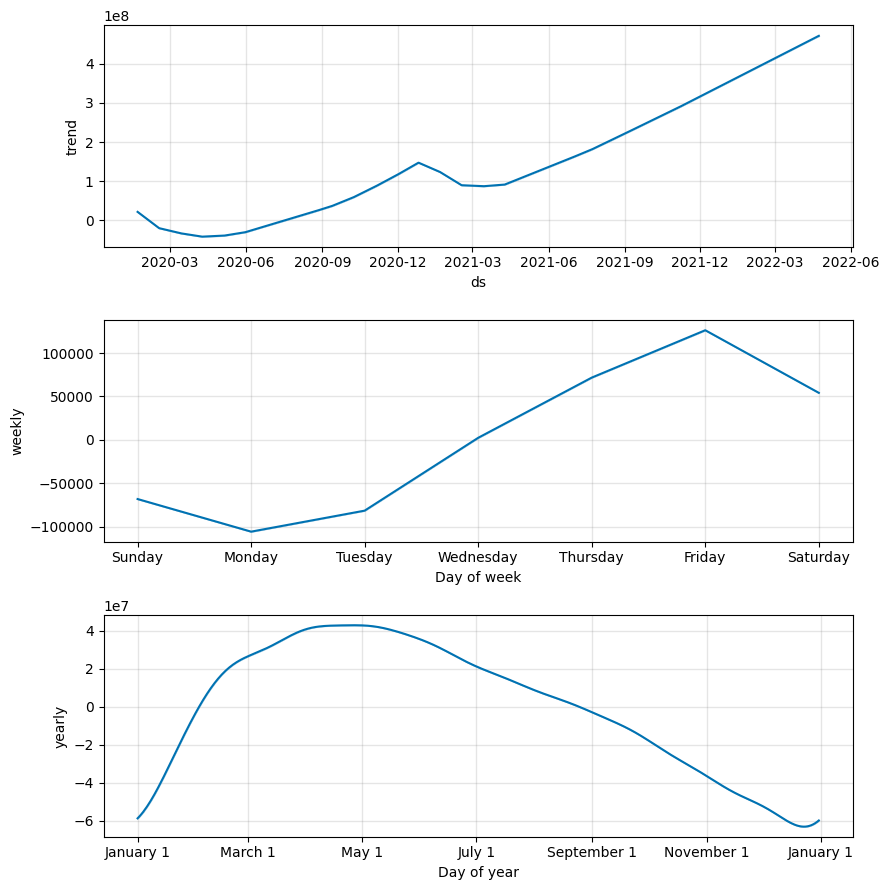

In [ ]:
confirmed_plot_weekly=model.plot_components(forecast)

In [ ]:
###forecasting confirmed cases for India

In [ ]:
#India
df_india = df[df['Country']=='India']
df_india.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
65280,2020-01-22,India,0,0,0,0
65281,2020-01-23,India,0,0,0,0
65282,2020-01-24,India,0,0,0,0
65283,2020-01-25,India,0,0,0,0
65284,2020-01-26,India,0,0,0,0


In [ ]:
confirmed  = df_india.groupby('Date')['Confirmed'].sum().reset_index()

In [ ]:
confirmed.rename(columns={'Date':"ds","Confirmed":"y"},inplace=True)
confirmed.tail()

,ds,y
811,2022-04-12,43038016
812,2022-04-13,43039023
813,2022-04-14,43039972
814,2022-04-15,43040947
815,2022-04-16,43042097


In [ ]:
#### Building the Model
m = Prophet(interval_width=0.95)  ## Confidence Level

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumm6xyva/80cp_8at.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumm6xyva/xfz0qa3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69846', 'data', 'file=/tmp/tmpumm6xyva/80cp_8at.json', 'init=/tmp/tmpumm6xyva/xfz0qa3q.json', 'output', 'file=/tmp/tmpumm6xyva/prophet_modelcnemotpw/prophet_model-20241124104307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods = 7)
future.tail(7)

,ds
816,2022-04-17
817,2022-04-18
818,2022-04-19
819,2022-04-20
820,2022-04-21
821,2022-04-22
822,2022-04-23


In [ ]:
future.tail()

,ds
818,2022-04-19
819,2022-04-20
820,2022-04-21
821,2022-04-22
822,2022-04-23


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)
#yhat - predicted/forecasted value
#yhat_lower = lower value of prediction
#yhat_upper = upper value of prediction

,ds,yhat,yhat_lower,yhat_upper
816,2022-04-17,4.349352e+07,4.315794e+07,4.381174e+07
817,2022-04-18,4.357491e+07,4.324143e+07,4.389495e+07
818,2022-04-19,4.366982e+07,4.334048e+07,4.400260e+07
819,2022-04-20,4.377994e+07,4.342446e+07,4.411464e+07
820,2022-04-21,4.389181e+07,4.351381e+07,4.425460e+07
821,2022-04-22,4.401174e+07,4.360137e+07,4.436940e+07
822,2022-04-23,4.413724e+07,4.371688e+07,4.453112e+07


<Axes: xlabel='ds'>

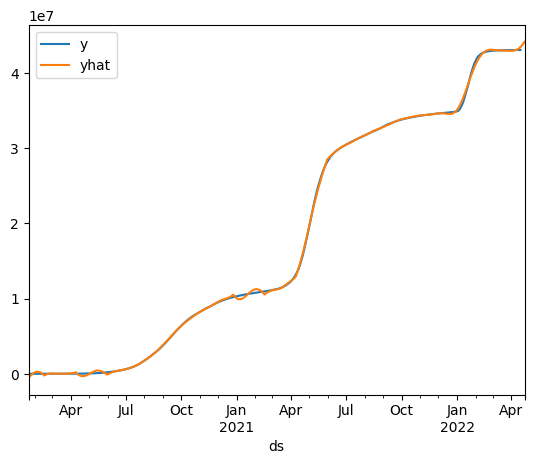

In [ ]:
pd.concat([confirmed.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

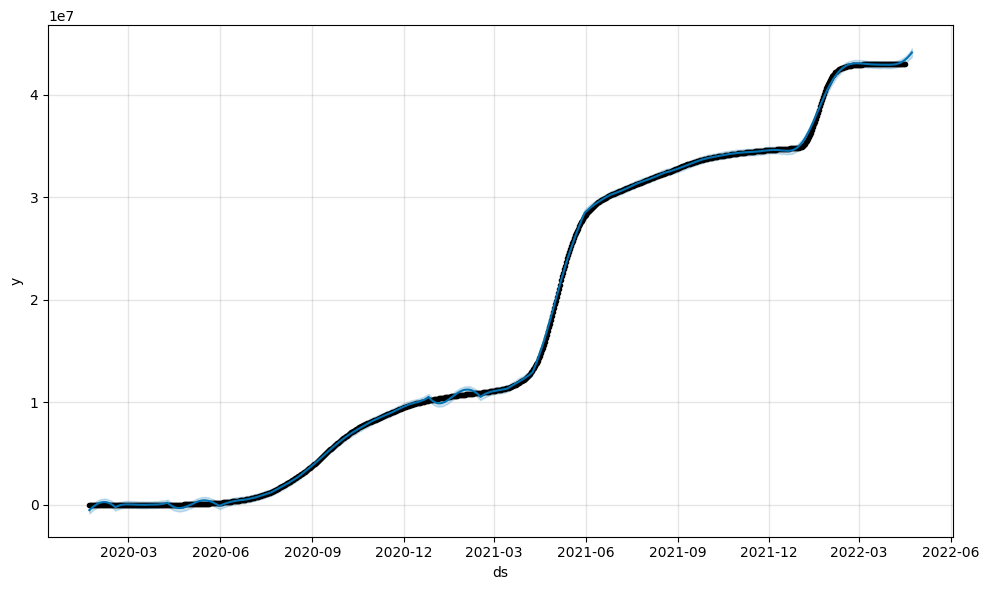

In [ ]:
india_plot = m.plot(forecast)

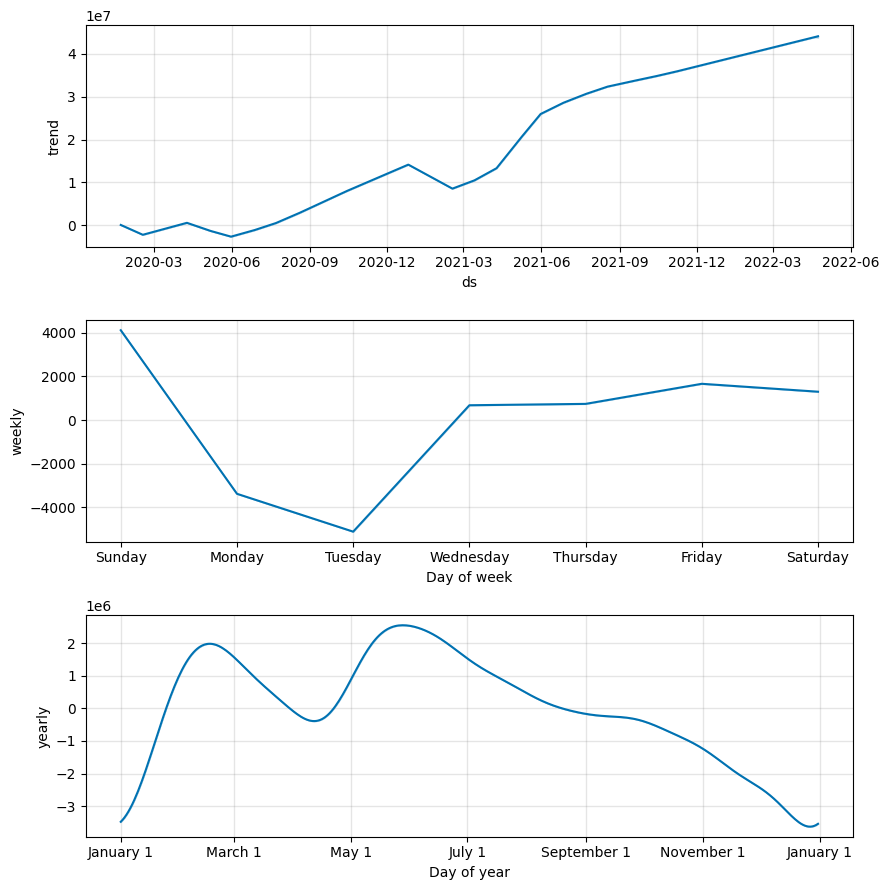

In [ ]:
confirmed_plot_weekly=m.plot_components(forecast)

In [ ]:
from prophet.diagnostics import cross_validation
df_cv=cross_validation(model=m,initial='180 days', horizon='90 days')

INFO:prophet:Making 13 forecasts with cutoffs between 2020-07-25 00:00:00 and 2022-01-16 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpumm6xyva/7_a4ppz1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumm6xyva/oxlukdf1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80565', 'data', 'file=/tmp/tmpumm6xyva/7_a4ppz1.json', 'init=/tmp/tmpumm6xyva/oxlukdf1.json', 'output', 'file=/tmp/tmpumm6xyva/prophet_modelt_rn5pds/prophet_model-20241124104340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumm6xyva/xgxfd5p2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpumm6xyva/7xnqjvpj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
from prophet.diagnostics import performance_metrics
df_p= performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,1.477126e+11,3.843340e+05,1.938352e+05,0.009059,0.003778,0.009151,0.470085
1,10 days,1.885954e+11,4.342758e+05,2.248430e+05,0.010633,0.004899,0.010749,0.444444
2,11 days,2.345465e+11,4.843000e+05,2.570700e+05,0.012235,0.005902,0.012380,0.427350
3,12 days,2.848715e+11,5.337336e+05,2.899498e+05,0.013852,0.007233,0.014030,0.435897
4,13 days,3.398584e+11,5.829738e+05,3.235078e+05,0.015482,0.008476,0.015698,0.444444
...,...,...,...,...,...,...,...,...
77,86 days,3.709862e+13,6.090863e+06,4.587575e+06,0.212431,0.151783,0.267126,0.538462
78,87 days,3.799348e+13,6.163885e+06,4.663575e+06,0.214962,0.155405,0.270389,0.538462
79,88 days,3.890441e+13,6.237340e+06,4.744041e+06,0.217692,0.162139,0.273899,0.538462
80,89 days,3.982997e+13,6.311099e+06,4.828688e+06,0.220600,0.165438,0.277620,0.538462
